# Numpy - First Neural Network

In [2]:
# Package imports
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Numpy basics

1-dimension

In [ ]:
a = np.array([1,2,3])
print(type(a), a)

<class 'numpy.ndarray'> [1 2 3]


In [ ]:
b = np.arange(1, 5, .5)
print(b)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [ ]:
b.shape

(8,)

2-dimensions

In [ ]:
b = np.array([[1,2,3],[4,5,6]])

In [ ]:
b

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
b.shape

(2, 3)

In [ ]:
b[0][1]

2

In [ ]:
b.reshape((3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
b[:2, 1:3]

array([[2, 3],
       [5, 6]])

In [ ]:
b>5

array([[False, False, False],
       [False, False,  True]])

In [ ]:
b[b>5]

array([6])

In [ ]:
a, b

(array([1, 2, 3]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [ ]:
a.shape, b.shape

((3,), (2, 3))

In [ ]:
a[np.newaxis, :]

array([[1, 2, 3]])

In [ ]:
np.expand_dims(a, axis=0)

In [ ]:
np.concatenate((a[np.newaxis, :],b), axis=0)

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a[:, np.newaxis],b.T))

## Generating a dataset

In [5]:
import sklearn.datasets

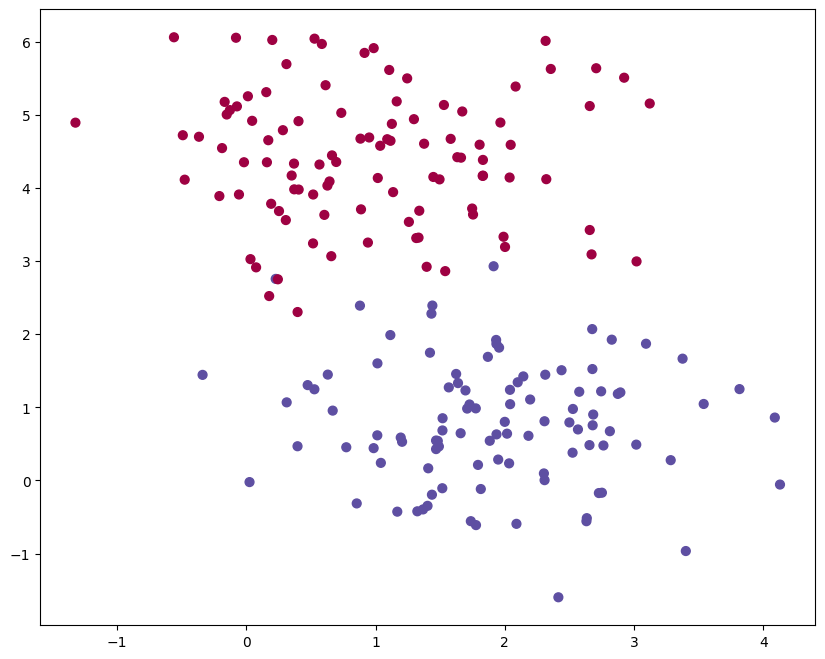

In [15]:
# Generate a dataset and plot it
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [10]:
X.shape, y.shape

((200, 2), (200,))

## Sigmoid function

$\displaystyle \sigma(x)=\frac{1}{1+e^{-x}}$

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
sigmoid(1)

0.7310585786300049

In [13]:
np.ones((1, 2))

array([[1., 1.]])

In [14]:
sigmoid(np.ones((1, 2)))

array([[0.73105858, 0.73105858]])

In [15]:
x = np.linspace(-5, 5)
x.shape

(50,)

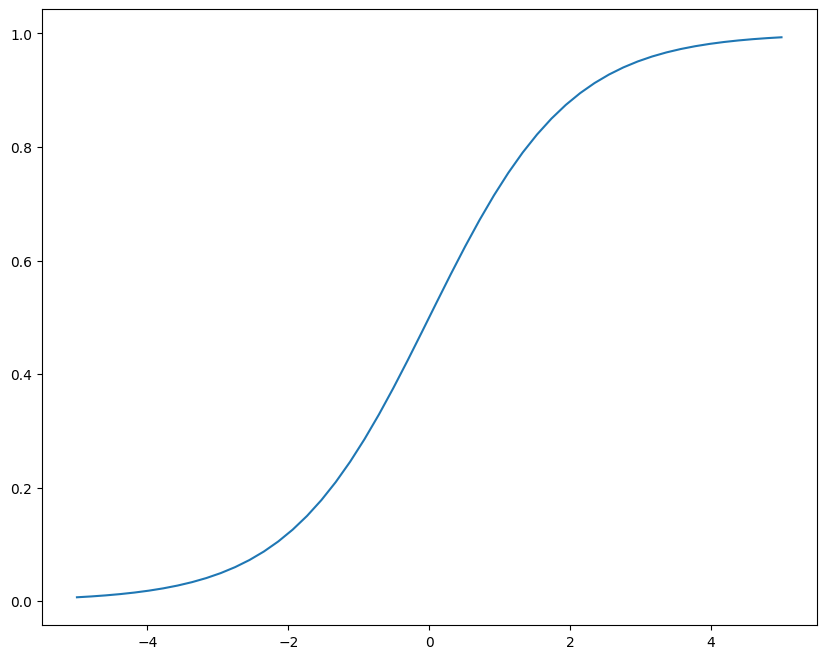

In [16]:
plt.plot(x, sigmoid(x))

$\displaystyle \sigma'(x)=\frac{d}{dx}\sigma(x)=\sigma(x)(1-\sigma(x))$

*Exercise: try to proof it!*

In [17]:
def dsigmoid(x):
    return x * (1 - x)

## Perceptron

https://en.wikipedia.org/wiki/Perceptron

![perceptron](https://miro.medium.com/max/1400/1*xcEOFhZLyyo3uxzAt6KndQ.png)



**Model:**

In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input $ \mathbf {x}$  (a real-valued vector) to an output value $ f(\mathbf {x} )$ (a single binary value):

$ f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}} $


where $ \mathbf {w} $  is a vector of real-valued weights, $ \mathbf {w} \cdot \mathbf {x} $ is the dot product ${\displaystyle \sum _{i=1}^{m}w_{i}x_{i}} $, where m is the number of inputs to the perceptron, and b is the bias.



**Learning algorithm:**

1. Initialize the weights. Weights may be initialized to 0 or to a small random value
2. For each example *j* in our training set *D*, perform the following steps over the input $ \mathbf {x} _{j}$ and desired output $ d_{j}$

    a. Calculate the actual output:

$\begin{aligned}y_{j}(t)&=f[\mathbf {w} (t)\cdot \mathbf {x} _{j}]\\&=f[w_{0}(t)x_{j,0}+w_{1}(t)x_{j,1}+w_{2}(t)x_{j,2}+\dotsb +w_{n}(t)x_{j,n}]\end{aligned}$

    b. Update the weights:
${\displaystyle w_{i}(t+1)=w_{i}(t)\;{\boldsymbol {+}}\;r\cdot (d_{j}-y_{j}(t))x_{j,i}}$, for all features ${\displaystyle 0\leq i\leq n}$, $\displaystyle r$ is the learning rate.



In [18]:
def activation(x):
    return np.where( x > 0 , 1, 0)

In [19]:
x = np.linspace(-5, 5)

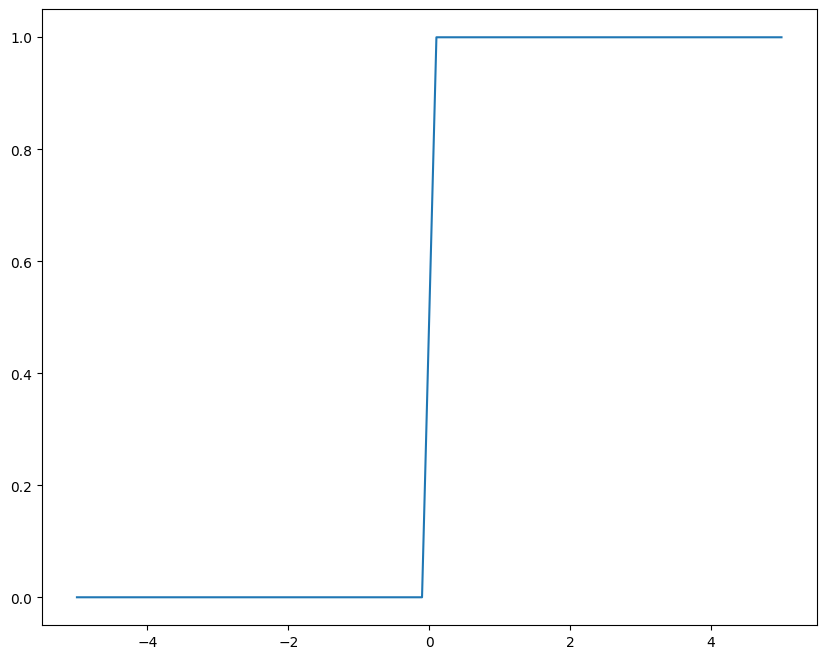

In [20]:
plt.plot(x, activation(x))

In [21]:
def perceptron(w, x):
    return activation(np.dot(x, w))

In [17]:
import time
from IPython import display

In [16]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

### Train model

In [22]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) - 1

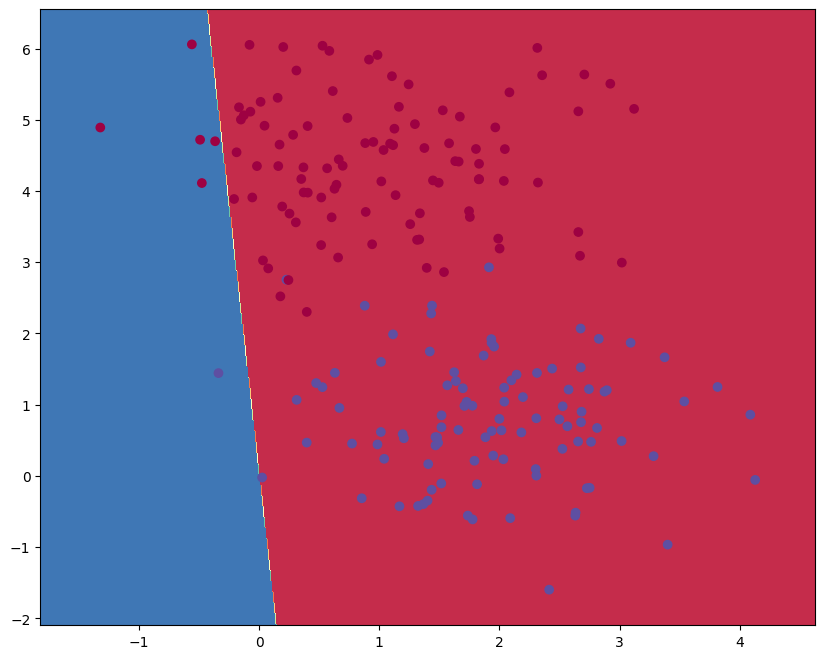

In [23]:
plot_decision_boundary(lambda x: perceptron(w, x))

In [24]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [25]:
perceptron(w, X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
y - perceptron(w, X)

array([ 1,  1,  1,  1,  0,  0,  0,  0,  1, -1,  1,  1,  0,  0,  1,  0,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,
        0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1, -1, -1,  1,
        0, -1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,
        0,  0, -1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  0,
        0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,
        0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,
        1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0])

In [27]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) - 1

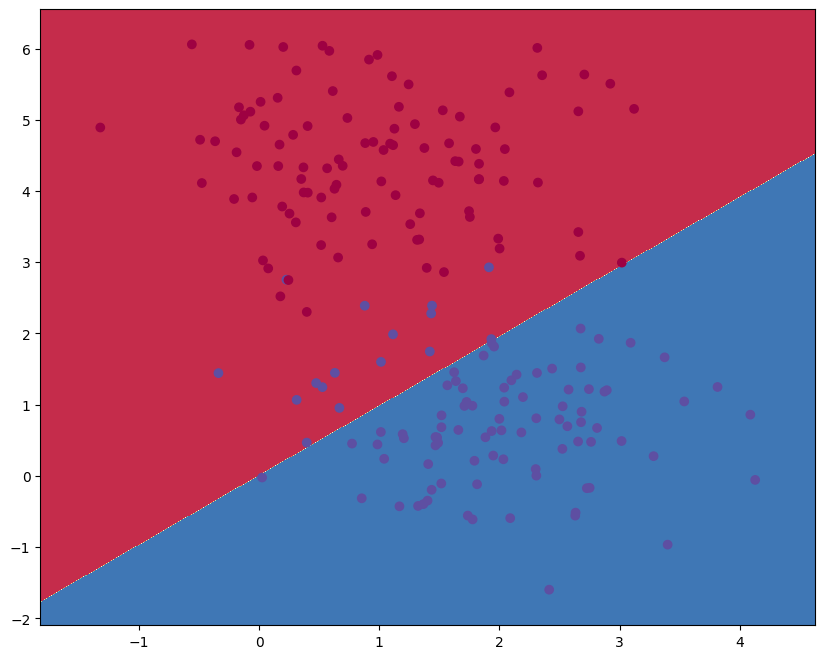

'Error:0.08'

In [28]:
LR = 1
for j in range(5):
    # get preds
    pred = perceptron(w, X)

    # how much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))


    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(error))
    time.sleep(0.5)

    # update weights
    w = w + LR * np.dot(X.T, diff)

---

## Homework


Can you make a perfect classifier? Let's consider the next dataset:

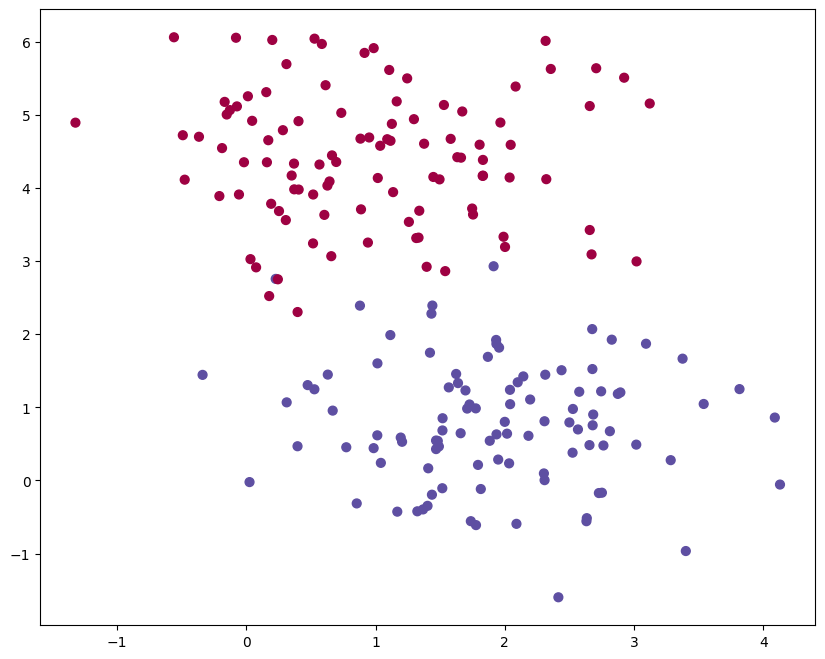

In [29]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

#### 1. Try to tune the learning rate and number of iterations
*What is the lowest error with the current approach?*

Add early stopping to find the optimal number of iterations automatically.

Visualize the decision boundary

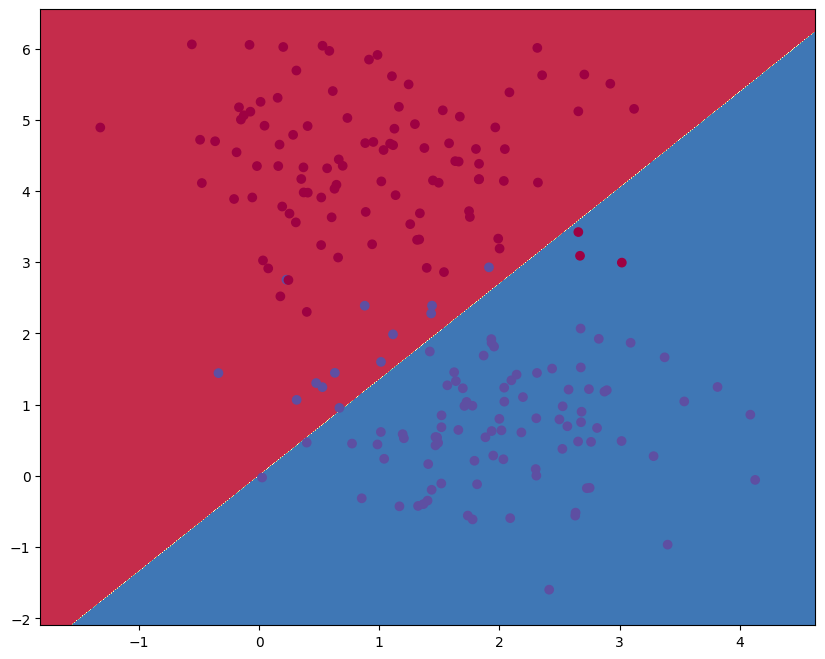

'Error:0.08'

In [30]:
LR = 0.1  # Learning rate
max_iterations = 1000  # max iteration
patience = 10 # early stopping

def perceptron(w, x):
    return activation(np.dot(x, w))

#error
best_error = float('inf')
best_weights = w.copy()
no_change_count = 0

for j in range(max_iterations):
    # get preds
    pred = perceptron(w, X)

    # How much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))

    if error < best_error:
        best_error = error
        best_weights = w.copy()
        no_change_count = 0
    else:
        no_change_count += 1

    if no_change_count >= patience:
        break


    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, x))
    display.display("Error:" + str(error))
    time.sleep(0.5)

    # update weights
    w = w + LR * np.dot(X.T, diff)

#### 2. It's time to add learnable bias
*What is the lowest error now?*

Visualize the decision boundary

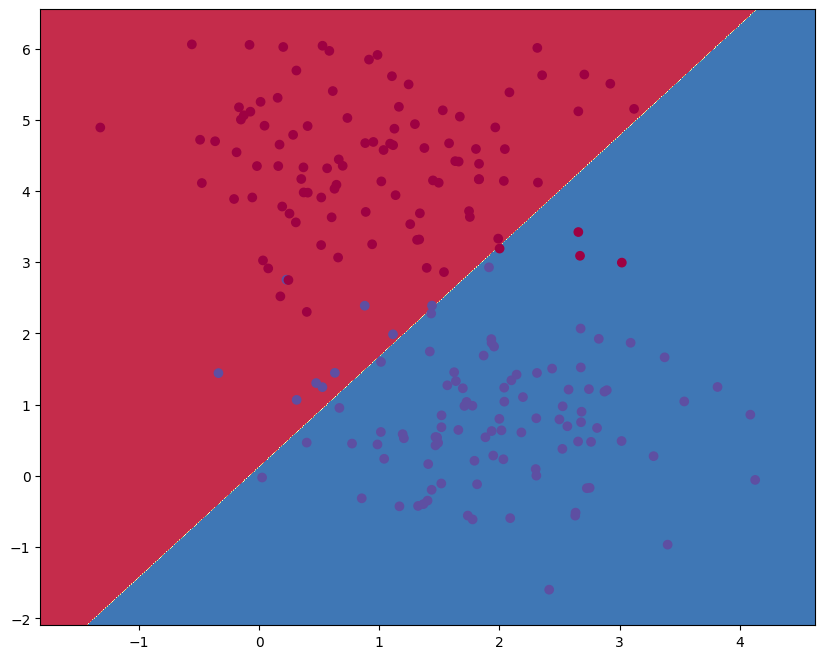

'Error:0.065'

In [31]:
LR = 0.1  # Learning rate
max_iterations = 1000  # max iteration
patience = 10 # early stopping

b = 2 * np.random.random() - 1

def perceptron(w, b, x):
    return activation(np.dot(x, w) + b)

#error
best_error = float('inf')
best_weights = w.copy()
best_bias = b
no_change_count = 0

for j in range(max_iterations):
    # get preds
    pred = perceptron(w, b, X)

    # How much did we miss?
    diff = y - pred
    error = np.mean(np.abs(diff))

    if error < best_error:
        best_error = error
        best_weights = w.copy()
        best_bias = b
        no_change_count = 0
    else:
        no_change_count += 1

    if no_change_count >= patience:
        break


    # draw result
    display.clear_output(wait=True)
    plot_decision_boundary(lambda x: perceptron(w, b, x))
    display.display("Error:" + str(error))
    time.sleep(0.5)

    # update weights
    w = w + LR * np.dot(X.T, diff)

    # update bias
    b = b + LR * np.sum(diff)

#### 3*. Let's expand it for three classes

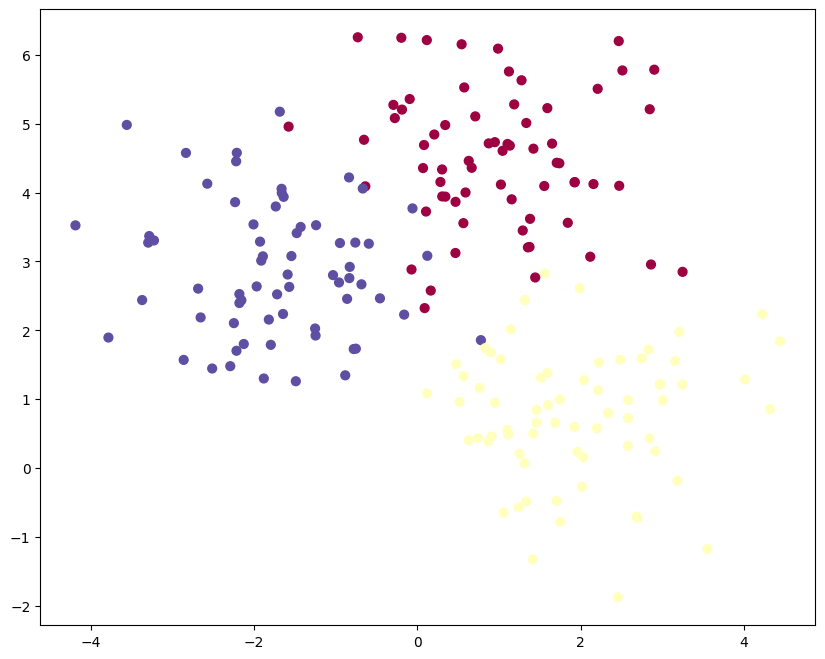

In [38]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [33]:
def plot_decision_boundary_multi(predict_funcs):
   # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.zeros(xx.ravel().shape)
    for i, predict_func in enumerate(predict_funcs):
        Z = np.maximum(Z, (predict_func(np.c_[xx.ravel(), yy.ravel()])) * (i + 1))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

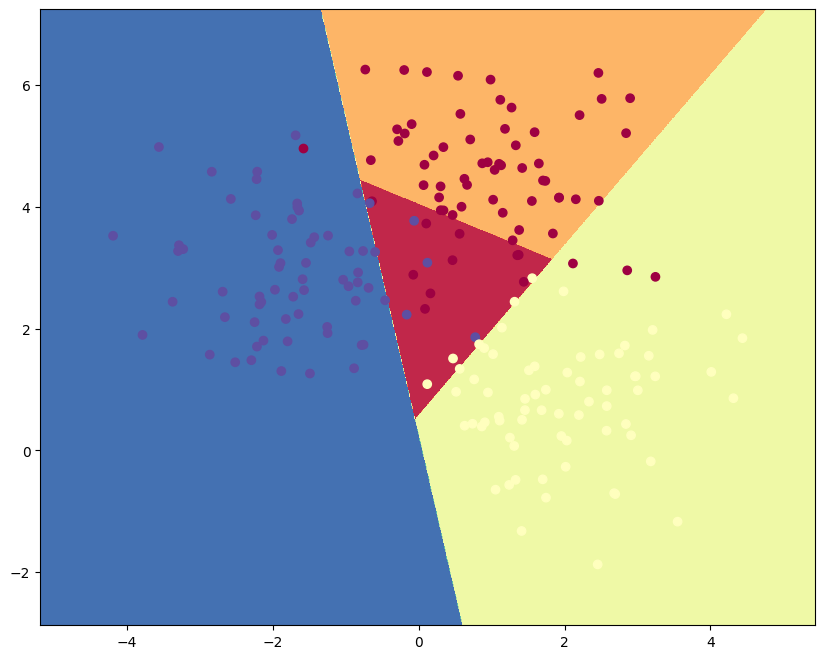

In [39]:
def activation(x):
    return np.where(x > 0, 1, 0)

def perceptron(w, b, x):
    return activation(np.dot(x, w) + b)

def train_perceptron(X, y, LR=0.1, max_iterations=1000, patience=10):
  w = 2 * np.random.random((2,)) - 1
  b = 2 * np.random.random() - 1

  #error
  best_error = float('inf')
  best_weights = w.copy()
  best_bias = b
  no_change_count = 0


  for j in range(max_iterations):
      # get preds
      pred = perceptron(w, b, X)

      # How much did we miss?
      diff = y - pred
      error = np.mean(np.abs(diff))

      if error < best_error:
          best_error = error
          best_weights = w.copy()
          best_bias = b
          no_change_count = 0
      else:
          no_change_count += 1

      if no_change_count >= patience:
          break

      # update weights and bias
      w = w + LR * np.dot(X.T, diff)
      b = b + LR * np.sum(diff)

  return best_weights, best_bias

# train weights for each class
weights = []
biases = []
predict_funcs = []
for class_label in np.unique(y):
    y_binary = np.where(y == class_label, 1, 0)
    w, b = train_perceptron(X, y_binary)
    weights.append(w)
    biases.append(b)
    predict_funcs.append(lambda x, w=w, b=b: perceptron(w, b, x))

plot_decision_boundary_multi(predict_funcs)

**Idea:** we need to train weights for each class

\begin{equation}
y_p =   \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{p}^T \mathbf{w}_c^{\,}.
\end{equation}

Visualize the decision boundary